### 딥-러닝 과정 CNN 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# GPU 확인

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11384267741416699668,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7511474176
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13993316812827507676
 physical_device_desc: "device: 0, name: NVIDIA Tesla M60, pci bus id: 0001:00:00.0, compute capability: 5.2"]

In [2]:
# 1. 데이터 불러오기
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


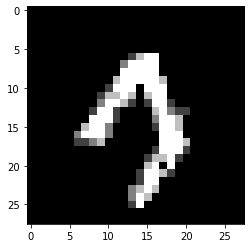

In [3]:
# 2. 이미지 데이터 확인하기 🖼
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(x_train[340], cmap=plt.cm.gray)


In [4]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_train[0])

(60000, 28, 28, 1)
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  

In [5]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [6]:
# 4. Label 전처리 (one-hot encoding) 

from tensorflow.keras import utils


y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [17]:
# 5. 모델 생성 : CNN 🌟🌟🌟
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

#(filters=128, kernel_size=(3,3), padding='same')
model= keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=x_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [18]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics='accuracy')

In [19]:
from keras.callbacks import EarlyStopping

# 빠른 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
# 7. 모델 학습시키기
hist = model.fit(x_train,y_train,batch_size=100,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
480/480 [==============================] - 5s 8ms/step - loss: 0.3888 - accuracy: 0.8784 - val_loss: 0.0834 - val_accuracy: 0.9743
Epoch 2/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0636 - val_accuracy: 0.9821
Epoch 3/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0447 - val_accuracy: 0.9882
Epoch 4/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0440 - val_accuracy: 0.9874
Epoch 5/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 6/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0376 - val_accuracy: 0.9898
Epoch 7/100
480/480 [==============================] - 3s 7ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0457 - val_accuracy: 0.9892

In [21]:
# 8. 모델 평가하기
model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9892


[0.0390259250998497, 0.9891999959945679]

In [22]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

# import numpy as np
# for index in np.random.choice(len(y_test), 3, replace = False):
#     test_image = x_test[index].reshape(1, 28,28,1)
#     predicted = model.predict(test_image)
#     label = y_test[index]
#     result_label = np.where(label == np.amax(label))
#     result_predicted = np.where(predicted == np.amax(predicted))
#     title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
#     fig = plt.figure(1, figsize = (3,3))
#     ax1 = fig.add_axes((0,0,.8,.8))
#     ax1.set_title(title)
#     images = x_test
#     plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
#     plt.show()

In [23]:
# 10. 학습 시각화하기
model.save('model.h5')